# Language Model Exercises
In these exercises you will extend and develop language models. We will use the code from the notes, but within a python package [`lm`](http://localhost:8888/edit/statnlpbook/lm.py).

## <font color='green'>Setup 1</font>: Load Libraries

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys, os
_snlp_book_dir = ".."
sys.path.append(_snlp_book_dir) 
from statnlpbook.lm import *
from statnlpbook.ohhla import *
# %cd .. 
import sys
sys.path.append("..")
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)

<!---
Latex Macros
-->
$$
\newcommand{\prob}{p}
\newcommand{\vocab}{V}
\newcommand{\params}{\boldsymbol{\theta}}
\newcommand{\param}{\theta}
\DeclareMathOperator{\perplexity}{PP}
\DeclareMathOperator{\argmax}{argmax}
\newcommand{\train}{\mathcal{D}}
\newcommand{\counts}[2]{\#_{#1}(#2) }
$$

## <font color='green'>Setup 2</font>: Load Data

In [2]:
docs = load_all_songs("../data/ohhla/train/www.ohhla.com/anonymous/j_live/")
assert len(docs) == 50, "Your ohhla corpus is corrupted, please download it again!"
trainDocs, testDocs = docs[:len(docs)//2], docs[len(docs)//2:] 
train = words(trainDocs)
test = words(testDocs)

## <font color='blue'>Task 1</font>: Optimal Pseudo Count 

Plot the perplexity for laplace smoothing on the given data as a function of alpha in the interval [0.001, 0.1] in steps by 0.001. Is it fair to assume that this is a convex function? Write a method that finds the optimal pseudo count `alpha` number for [laplace smoothing](https://github.com/uclmr/stat-nlp-book/blob/python/statnlpbook/lm.py#L180) for the given data up to some predefined numerical precision `epsilon` under the assumption that the perplexity is a convex function of alpha. How often did you have to call `perplexity` to find the optimum?

Tips:
<font color='white'>
You don't need 1st or 2nd order derivatives in this case, only the gradient descent direction. Think about recursively slicing up the problem.
</font>

1.0 0.0


0.0

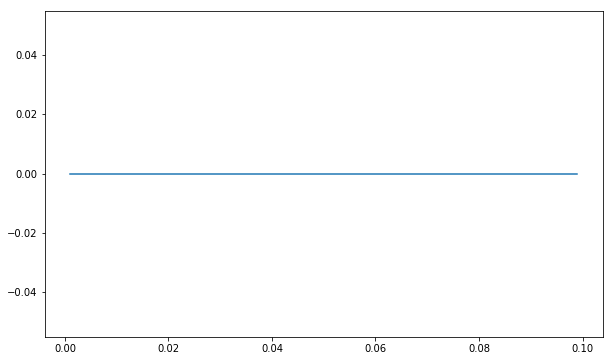

In [3]:
oov_train = inject_OOVs(train)
oov_vocab = set(oov_train)
oov_test = replace_OOVs(oov_vocab, test)
bigram = NGramLM(oov_train,2)

interval = [x/1000.0 for x in range(1, 100, 1)]
perplexity_at_1 = perplexity(LaplaceLM(bigram, alpha=1.0), oov_test)

def plot_perplexities(interval):
    """Plots the perplexity of LaplaceLM for every alpha in interval."""
    perplexities = [0.0 for alpha in interval]  # todo
    plt.plot(interval, perplexities)
    
def find_optimal(low, high, epsilon=1e-6):
    """Returns the optimal pseudo count alpha within the interval [low, high] and the perplexity."""
    print(high, low)
    if high - low < epsilon:
        return 0.0  # todo
    else:
        return 0.0  # todo

plot_perplexities(interval)        
find_optimal(0.0, 1.0)

## <font color='blue'>Task 2</font>: Sanity Check LM
Implement a method that tests whether a language model provides a valid probability distribution.

In [4]:
def sanity_check(lm, *history):
    """Throws an AssertionError if lm does not define a valid probability distribution for all words 
    in the vocabulary."""  
    probability_mass = 1.0  # todo
    assert abs(probability_mass - 1.0) < 1e-6, probability_mass

unigram = NGramLM(oov_train,1)
stupid = StupidBackoff(bigram, unigram, 0.1)
print(sum([stupid.probability(word, 'the') for word in stupid.vocab]))
sanity_check(stupid, 'the')

1.064711557993089


## <font color='blue'>Task 3</font>: Subtract Count LM
Develop and implement a language model that subtracts a count $d\in[0,1]$ from each non-zero count in the training set. Let's first formalize this:


\begin{align}
\#_{w=0}(h_n) &= \sum_{w \in V} \mathbf{1}[\counts{\train}{h_n,w} = 0]\\
\#_{w>0}(h_n) &= \sum_{w \in V} \mathbf{1}[\counts{\train}{h_n,w} > 0]\\
\prob(w|h_n) &= 
\begin{cases}
\frac{\counts{\train}{h_n,w} - d}{\counts{\train}{h_n}}  & \mbox{if }\counts{\train}{h_n,w} > 0 \\\\
\frac{???}{\counts{\train}{h_n}} & \mbox{otherwise}
\end{cases}
\end{align}

In [5]:
class SubtractCount(CountLM):        
    def __init__(self, base_lm, d):
        super().__init__(base_lm.vocab, base_lm.order)
        self.base_lm = base_lm
        self.d = d            
        self._counts = base_lm._counts  # not good style since it is a protected member
        self.vocab = base_lm.vocab

    def counts(self, word_and_history):
        if self._counts[word_and_history] > 0:
            return 0.0  # todo
        else:
            return 0.0  # todo

    def norm(self, history):
        return self.base_lm.norm(history)    
    
subtract_lm = SubtractCount(unigram, 0.1)
oov_prob = subtract_lm.probability(OOV, 'the')
rest_prob = sum([subtract_lm.probability(word, 'the') for word in subtract_lm.vocab])
print(oov_prob + rest_prob)
sanity_check(subtract_lm, 'the')
perplexity(subtract_lm, oov_test)

0.0


inf

## <font color='blue'>Task 4</font>: Normalisation of Stupid LM
Develop and implement a version of the [stupid language model](https://github.com/uclmr/stat-nlp-book/blob/python/statnlpbook/lm.py#L205) that provides probabilities summing up to 1.

In [6]:
class StupidBackoffNormalized(LanguageModel):
    def __init__(self, main, backoff, alpha):
        super().__init__(main.vocab, main.order)
        self.main = main
        self.backoff = backoff
        self.alpha = alpha               

    def probability(self, word, *history):
        return 0.0  # todo
        
less_stupid = StupidBackoffNormalized(bigram, unigram, 0.1)
print(sum([less_stupid.probability(word, 'the') for word in less_stupid.vocab]))
sanity_check(less_stupid, 'the')
perplexity(less_stupid, oov_test)

0.0


inf